<a href="https://colab.research.google.com/github/TaishiRoy/Pedagogy_Design_using_NN/blob/master/code_2_qs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

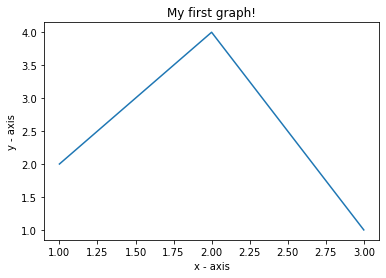

In [ ]:
import matplotlib.pyplot as plt 
  
# x axis values 
x = [1,2,3] 
# corresponding y axis values 
y = [2,4,1] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show() 

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Similar to the character encoding used in the character-level RNN
tutorials, we will be representing each word in a language as a one-hot
vector, or giant vector of zeros except for a single one (at the index
of the word). Compared to the dozens of characters that might exist in a
language, there are many many more words, so the encoding vector is much
larger. We will however cheat a bit and trim the data to only use a few
thousand words per language.

.. figure:: /_static/img/seq-seq-images/word-encoding.png
   :alt:





We'll need a unique index per word to use as the inputs and targets of
the networks later. To keep track of all this we will use a helper class
called ``Lang`` which has word → index (``word2index``) and index → word
(``index2word``) dictionaries, as well as a count of each word
``word2count`` to use to later replace rare words.




In [ ]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

The files are all in Unicode, to simplify we will turn Unicode
characters to ASCII, make everything lowercase, and trim most
punctuation.




In [ ]:
# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [ ]:
#-----------------------------T-------------------------------------------
# modify the trimming and non letter character inclusion

In [ ]:
#-----------------------------T-------------------------------------------
# use the reverse flag as true to translate from other language to english

In [ ]:
#-----------------------------T-------------------------------------------
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    lines = open('pythonData.txt').read().strip().split("$$$")

    # print(lines[2]);
    codeqs = [line.split("***") for line in lines]
    # print(codeqs)
    code = [i[0] for i in codeqs]
    qs = [i[1].split(';') for i in codeqs]
    # print("CODE__________________________________________________")
    # print(code[0])
    # print("QS____________________________________________________")
    # print(qs[0])
    pair=[]
    tupl=[]
    for i in range(len(code)):
      for ques in qs[i]:
        tupl.append(code[i])
        tupl.append(ques)
        pair.append(tupl)
        tupl=[]
      
    # print(pair[5])
    input_lang = Lang(lang1)
    output_lang = Lang(lang2)
    # print(input_lang)
    return input_lang, output_lang, pair


In [ ]:
#-----------------------------T-------------------------------------------
# do not do this filtering our code will be quite lengthy
# if required keep the upper bound at atleast 1000 words
# the prefix filter part is also not applicable ( or modify it for oops keywords )

In [ ]:
#-----------------------------T-------------------------------------------
MAX_LENGTH = 10000


def trimPair(p):
  import re
  thisCode=p[0]
  thisCode = re.sub(re.compile("\'\'\'.*?\'\'\'",re.DOTALL ) ,"" ,thisCode) # remove all occurrences streamed comments (/*COMMENT */) from string
  thisCode = re.sub(re.compile("#.*?\n" ) ,"" ,thisCode) # remove all occurrence single-line comments (//COMMENT\n ) from string
  thisCode = re.sub(re.compile("#.*?$" ) ,"" ,thisCode)
  p[0]=thisCode
  return p


The full process for preparing the data is:

-  Read text file and split into lines, split lines into pairs
-  Normalize text, filter by length and content
-  Make word lists from sentences in pairs




In [ ]:
#-----------------------------T-------------------------------------------
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s pairs" % len(pairs))
    # pairs = trimData(pairs)
    for pair in pairs:
      pair = trimPair(pair)
    print("Trimmed pairs")
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'pyt', True)
print(random.choice(pairs))

Reading lines...
Read 58 pairs
Trimmed pairs
Counting words...
Counted words:
eng 864
pyt 95
["\nclass Player:\n    def __init__(self, name=None, yards=120, touchdowns=5, safety=1,\n                 interceptions=0, field_goals=3):\n        self.name = name\n        self.yards = yards\n        self.touchdowns = touchdowns\n        self.safety = safety\n        self.interceptions = interceptions\n        self.field_goals = field_goals\n\n    def get_points(self):\n\toints = 6 * self.stats['td']\n        safety_points = 2 * self.stats['safety']\n        total_points = td_points + safety_points\n        return total_points\n\n\nclass Quarterback(Player):\n    def __init__(self, name=None, yards=130, touchdowns=5, completed_passes=20,\n                 interceptions=4, safety=None, field_goals=None):\n        super().__init__(name=name, yards=yards, touchdowns=touchdowns,\n                         safety=safety, interceptions=interceptions)\n        self.completed_passes = completed_passes

The Seq2Seq Model
=================

A Recurrent Neural Network, or RNN, is a network that operates on a
sequence and uses its own output as input for subsequent steps.

A `Sequence to Sequence network <https://arxiv.org/abs/1409.3215>`__, or
seq2seq network, or `Encoder Decoder
network <https://arxiv.org/pdf/1406.1078v3.pdf>`__, is a model
consisting of two RNNs called the encoder and decoder. The encoder reads
an input sequence and outputs a single vector, and the decoder reads
that vector to produce an output sequence.

.. figure:: /_static/img/seq-seq-images/seq2seq.png
   :alt:

Unlike sequence prediction with a single RNN, where every input
corresponds to an output, the seq2seq model frees us from sequence
length and order, which makes it ideal for translation between two
languages.

Consider the sentence "Je ne suis pas le chat noir" → "I am not the
black cat". Most of the words in the input sentence have a direct
translation in the output sentence, but are in slightly different
orders, e.g. "chat noir" and "black cat". Because of the "ne/pas"
construction there is also one more word in the input sentence. It would
be difficult to produce a correct translation directly from the sequence
of input words.

With a seq2seq model the encoder creates a single vector which, in the
ideal case, encodes the "meaning" of the input sequence into a single
vector — a single point in some N dimensional space of sentences.




The Encoder
-----------

The encoder of a seq2seq network is a RNN that outputs some value for
every word from the input sentence. For every input word the encoder
outputs a vector and a hidden state, and uses the hidden state for the
next input word.

.. figure:: /_static/img/seq-seq-images/encoder-network.png
   :alt:





In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

The Decoder
-----------

The decoder is another RNN that takes the encoder output vector(s) and
outputs a sequence of words to create the translation.




Simple Decoder
^^^^^^^^^^^^^^

In the simplest seq2seq decoder we use only last output of the encoder.
This last output is sometimes called the *context vector* as it encodes
context from the entire sequence. This context vector is used as the
initial hidden state of the decoder.

At every step of decoding, the decoder is given an input token and
hidden state. The initial input token is the start-of-string ``<SOS>``
token, and the first hidden state is the context vector (the encoder's
last hidden state).

.. figure:: /_static/img/seq-seq-images/decoder-network.png
   :alt:





In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

I encourage you to train and observe the results of this model, but to
save space we'll be going straight for the gold and introducing the
Attention Mechanism.




Attention Decoder
^^^^^^^^^^^^^^^^^

If only the context vector is passed betweeen the encoder and decoder,
that single vector carries the burden of encoding the entire sentence.

Attention allows the decoder network to "focus" on a different part of
the encoder's outputs for every step of the decoder's own outputs. First
we calculate a set of *attention weights*. These will be multiplied by
the encoder output vectors to create a weighted combination. The result
(called ``attn_applied`` in the code) should contain information about
that specific part of the input sequence, and thus help the decoder
choose the right output words.

.. figure:: https://i.imgur.com/1152PYf.png
   :alt:

Calculating the attention weights is done with another feed-forward
layer ``attn``, using the decoder's input and hidden state as inputs.
Because there are sentences of all sizes in the training data, to
actually create and train this layer we have to choose a maximum
sentence length (input length, for encoder outputs) that it can apply
to. Sentences of the maximum length will use all the attention weights,
while shorter sentences will only use the first few.

.. figure:: /_static/img/seq-seq-images/attention-decoder-network.png
   :alt:





In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

<div class="alert alert-info"><h4>Note</h4><p>There are other forms of attention that work around the length
  limitation by using a relative position approach. Read about "local
  attention" in `Effective Approaches to Attention-based Neural Machine
  Translation <https://arxiv.org/abs/1508.04025>`__.</p></div>

Training
========

Preparing Training Data
-----------------------

To train, for each pair we will need an input tensor (indexes of the
words in the input sentence) and target tensor (indexes of the words in
the target sentence). While creating these vectors we will append the
EOS token to both sequences.




In [ ]:
#----------------------------------------T--------------------------------------

def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ' or ',' or '[' or ']' or '(' or ')' or '{' or '}' or ':' or '.' or '=' )]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    # print(indexes[0])
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

Training the Model
------------------

To train we run the input sentence through the encoder, and keep track
of every output and the latest hidden state. Then the decoder is given
the ``<SOS>`` token as its first input, and the last hidden state of the
encoder as its first hidden state.

"Teacher forcing" is the concept of using the real target outputs as
each next input, instead of using the decoder's guess as the next input.
Using teacher forcing causes it to converge faster but `when the trained
network is exploited, it may exhibit
instability <http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.378.4095&rep=rep1&type=pdf>`__.

You can observe outputs of teacher-forced networks that read with
coherent grammar but wander far from the correct translation -
intuitively it has learned to represent the output grammar and can "pick
up" the meaning once the teacher tells it the first few words, but it
has not properly learned how to create the sentence from the translation
in the first place.

Because of the freedom PyTorch's autograd gives us, we can randomly
choose to use teacher forcing or not with a simple if statement. Turn
``teacher_forcing_ratio`` up to use more of it.




In [ ]:
#--------------------------------T--------------------------------------------
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

This is a helper function to print time elapsed and estimated time
remaining given the current time and progress %.




In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

The whole training process looks like this:

-  Start a timer
-  Initialize optimizers and criterion
-  Create set of training pairs
-  Start empty losses array for plotting

Then we call ``train`` many times and occasionally print the progress (%
of examples, time so far, estimated time) and average loss.




In [ ]:
#---------------------------------T--------------------------------------------

def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    # encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    # decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
    showPlot(plot_losses)



Plotting results
----------------

Plotting is done with matplotlib, using the array of loss values
``plot_losses`` saved while training.




In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
  
    print(points)
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
    
    plt.show()

Evaluation
==========

Evaluation is mostly the same as training, but there are no targets so
we simply feed the decoder's predictions back to itself for each step.
Every time it predicts a word we add it to the output string, and if it
predicts the EOS token we stop there. We also store the decoder's
attention outputs for display later.




In [ ]:
#-------------------------------T-----------------------------------------
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words

We can evaluate random sentences from the training set and print out the
input, target, and output to make some subjective quality judgements:




In [ ]:
def getBLEUcurr( hypothesis, reference ):

  import nltk
  #there may be several reference
  BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis.strip().split())
  print("BLEUscore for cuurent pair: ",BLEUscore)
  return BLEUscore

In [ ]:
#--------------------------------T-------------------------------------
def evaluateRandomly(encoder, decoder, n=10):
    bleu_score=0
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')
        f= open("result.txt","a")
        f.writelines(["\n>"+pair[0]+'\n', "\n="+pair[1]+'\n', "\n<"+output_sentence])
        f.writelines("--------------------------")
        print(pair[1])
        bleu_score+=getBLEUcurr(pair[1], output_words)

    bleu_score/= n
    print("BLEU score is", bleu_score);

Training and Evaluating
=======================

With all these helper functions in place (it looks like extra work, but
it makes it easier to run multiple experiments) we can actually
initialize a network and start training.

Remember that the input sentences were heavily filtered. For this small
dataset we can use relatively small networks of 256 hidden nodes and a
single GRU layer. After about 40 minutes on a MacBook CPU we'll get some
reasonable results.

.. Note::
   If you run this notebook you can train, interrupt the kernel,
   evaluate, and continue training later. Comment out the lines where the
   encoder and decoder are initialized and run ``trainIters`` again.




Starting...
Encoder completed.....
Decoder completed...
0m 8s (- 1m 0s) (50 12%) 2.5497
0m 17s (- 0m 51s) (100 25%) 2.5207
0m 25s (- 0m 42s) (150 37%) 2.1191
0m 33s (- 0m 33s) (200 50%) 2.0574
0m 42s (- 0m 25s) (250 62%) 1.8223
0m 50s (- 0m 16s) (300 75%) 1.6826
0m 59s (- 0m 8s) (350 87%) 1.7634
1m 7s (- 0m 0s) (400 100%) 1.7434
[2.549654542771597, 2.520739014167289, 2.1190644110669994, 2.0574135920055325, 1.822311898807427, 1.6826004713892417, 1.7634475165541905, 1.7433996482122511]


<Figure size 432x288 with 0 Axes>

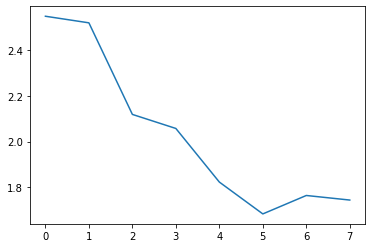

In [ ]:
hidden_size = 64
print("Starting...")
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
print("Encoder completed.....")
attn_decoder1 = DecoderRNN(hidden_size, output_lang.n_words).to(device)
print("Decoder completed...")
trainIters(encoder1, attn_decoder1, 400, print_every=50, plot_every=50)

In [ ]:
f= open("result.txt","w+")

evaluateRandomly(encoder1, attn_decoder1)

> 
class Parent():
    def __init__(self, last_name, eye_color):
        print (""Parent Constructor Called"")
        self.last_name  = last_name
        self.eye_color  = eye_color

    def show_info(self):         print (self.last_name)
        print (self.eye_color)

class Child(Parent):
    
    def __init__(self, last_name, eye_color, number_of_toys):
        print (""Child Constructor Called"")
        Parent.__init__(self, last_name, eye_color)
        self.number_of_toys  = number_of_toys

    def show_info(self):        print (self.last_name)
       print (self.eye_color)
       print (self.number_of_toys)

billy_cyrus = Parent (""Cyrus"", ""Blue"")
miley_cyrus = Child (""Cyrus"", ""blue"", 5)



miley_cyrus.show_info()
=  " 'miley_cyrus' is an instance of which class?"
<  " 'miley_cyrus' is an instance of which class?" <EOS>

 " 'miley_cyrus' is an instance of which class?"
BLEUscore for cuurent pair:  0.7788007830714049
> 


class Player:
    
    def __init__(self, name=No

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


 " 'latir' is a method of which class?" 
BLEUscore for cuurent pair:  0.32347562464306545
> 
class Bookstore(object):
    def __init__(self, name):
        self.name=name
        self.books = []
    def add_book(self, book):
        self.books.append(book)
    def get_books(self):
        return self.books
    def search_books(self, title=None, author=None):
        results = []
        if author == None:
            for i, value in enumerate(self.books):
                if title.lower() in self.books[i].title.lower():
                    results.append(self.books[i])
            return results
        else:
            for i, value in enumerate(self.books):
                if author.name.lower() in self.books[i].author.name.lower():
                    results.append(self.books[i])
            return results

class Author(object):
    def __init__(self, name, nationality):
        self.name = name
        self.nationality = nationality
        self.booklist = []
    
    def get_books

Visualizing Attention
---------------------

A useful property of the attention mechanism is its highly interpretable
outputs. Because it is used to weight specific encoder outputs of the
input sequence, we can imagine looking where the network is focused most
at each time step.

You could simply run ``plt.matshow(attentions)`` to see attention output
displayed as a matrix, with the columns being input steps and rows being
output steps:




In [ ]:
lines = open('pythonTestData.txt').read()

output_words = evaluate(
    encoder1, attn_decoder1, lines)
# plt.matshow(attentions.numpy())
print(output_words)

For a better viewing experience we will do the extra work of adding axes
and labels:




In [ ]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention("elle a cinq ans de moins que moi .")

evaluateAndShowAttention("elle est trop petit .")

evaluateAndShowAttention("je ne crains pas de mourir .")

evaluateAndShowAttention("c est un jeune directeur plein de talent .")

Exercises
=========

-  Try with a different dataset

   -  Another language pair
   -  Human → Machine (e.g. IOT commands)
   -  Chat → Response
   -  Question → Answer

-  Replace the embeddings with pre-trained word embeddings such as word2vec or
   GloVe
-  Try with more layers, more hidden units, and more sentences. Compare
   the training time and results.
-  If you use a translation file where pairs have two of the same phrase
   (``I am test \t I am test``), you can use this as an autoencoder. Try
   this:

   -  Train as an autoencoder
   -  Save only the Encoder network
   -  Train a new Decoder for translation from there




In [ ]:
# BLEU SCORE IMPLEMENTATION

'''Provides:
cook_refs(refs, n=4): Transform a list of reference sentences as strings into a form usable by cook_test().
cook_test(test, refs, n=4): Transform a test sentence as a string (together with the cooked reference sentences) into a form usable by score_cooked().
'''

import copy
import math
from collections import defaultdict

import six
from six.moves import xrange as range


def precook(s, n=4, out=False):
    """Takes a string as input and returns an object that can be given to
    either cook_refs or cook_test. This is optional: cook_refs and cook_test
    can take string arguments as well."""
    words = s.split()
    counts = defaultdict(int)
    for k in range(1,n+1):
        for i in range(len(words)-k+1):
            ngram = tuple(words[i:i+k])
            counts[ngram] += 1
    return (len(words), counts)

def cook_refs(refs, eff=None, n=4): ## lhuang: oracle will call with "average"
    '''Takes a list of reference sentences for a single segment
    and returns an object that encapsulates everything that BLEU
    needs to know about them.'''

    reflen = []
    maxcounts = {}
    for ref in refs:
        rl, counts = precook(ref, n)
        reflen.append(rl)
        for (ngram,count) in six.iteritems(counts):
            maxcounts[ngram] = max(maxcounts.get(ngram,0), count)

    # Calculate effective reference sentence length.
    if eff == "shortest":
        reflen = min(reflen)
    elif eff == "average":
        reflen = float(sum(reflen))/len(reflen)

    ## lhuang: N.B.: leave reflen computaiton to the very end!!
    
    ## lhuang: N.B.: in case of "closest", keep a list of reflens!! (bad design)

    return (reflen, maxcounts)

def cook_test(test, reflen_refmaxcounts, eff=None, n=4):
    '''Takes a test sentence and returns an object that
    encapsulates everything that BLEU needs to know about it.'''

    reflen, refmaxcounts = reflen_refmaxcounts
    testlen, counts = precook(test, n, True)

    result = {}

    # Calculate effective reference sentence length.
    
    if eff == "closest":
        result["reflen"] = min((abs(l-testlen), l) for l in reflen)[1]
    else: ## i.e., "average" or "shortest" or None
        result["reflen"] = reflen

    result["testlen"] = testlen

    result["guess"] = [max(0,testlen-k+1) for k in range(1,n+1)]

    result['correct'] = [0]*n
    for (ngram, count) in six.iteritems(counts):
        result["correct"][len(ngram)-1] += min(refmaxcounts.get(ngram,0), count)

    return result

class BleuScorer(object):
    """Bleu scorer.
    """

    __slots__ = "n", "crefs", "ctest", "_score", "_ratio", "_testlen", "_reflen", "special_reflen"
    # special_reflen is used in oracle (proportional effective ref len for a node).

    def copy(self):
        ''' copy the refs.'''
        new = BleuScorer(n=self.n)
        new.ctest = copy.copy(self.ctest)
        new.crefs = copy.copy(self.crefs)
        new._score = None
        return new

    def __init__(self, test=None, refs=None, n=4, special_reflen=None):
        ''' singular instance '''

        self.n = n
        self.crefs = []
        self.ctest = []
        self.cook_append(test, refs)
        self.special_reflen = special_reflen

    def cook_append(self, test, refs):
        '''called by constructor and __iadd__ to avoid creating new instances.'''
        
        if refs is not None:
            self.crefs.append(cook_refs(refs))
            if test is not None:
                cooked_test = cook_test(test, self.crefs[-1])
                self.ctest.append(cooked_test) ## N.B.: -1
            else:
                self.ctest.append(None) # lens of crefs and ctest have to match

        self._score = None ## need to recompute

    def ratio(self, option=None):
        self.compute_score(option=option)
        return self._ratio

    def score_ratio(self, option=None):
        '''return (bleu, len_ratio) pair'''
        return (self.fscore(option=option), self.ratio(option=option))

    def score_ratio_str(self, option=None):
        return "%.4f (%.2f)" % self.score_ratio(option)

    def reflen(self, option=None):
        self.compute_score(option=option)
        return self._reflen

    def testlen(self, option=None):
        self.compute_score(option=option)
        return self._testlen        

    def retest(self, new_test):
        if type(new_test) is str:
            new_test = [new_test]
        assert len(new_test) == len(self.crefs), new_test
        self.ctest = []
        for t, rs in zip(new_test, self.crefs):
            self.ctest.append(cook_test(t, rs))
        self._score = None

        return self

    def rescore(self, new_test):
        ''' replace test(s) with new test(s), and returns the new score.'''
        
        return self.retest(new_test).compute_score()

    def size(self):
        assert len(self.crefs) == len(self.ctest), "refs/test mismatch! %d<>%d" % (len(self.crefs), len(self.ctest))
        return len(self.crefs)

    def __iadd__(self, other):
        '''add an instance (e.g., from another sentence).'''

        if type(other) is tuple:
            ## avoid creating new BleuScorer instances
            self.cook_append(other[0], other[1])
        else:
            assert self.compatible(other), "incompatible BLEUs."
            self.ctest.extend(other.ctest)
            self.crefs.extend(other.crefs)
            self._score = None ## need to recompute

        return self        

    def compatible(self, other):
        return isinstance(other, BleuScorer) and self.n == other.n

    def single_reflen(self, option="average"):
        return self._single_reflen(self.crefs[0][0], option)

    def _single_reflen(self, reflens, option=None, testlen=None):
        
        if option == "shortest":
            reflen = min(reflens)
        elif option == "average":
            reflen = float(sum(reflens))/len(reflens)
        elif option == "closest":
            reflen = min((abs(l-testlen), l) for l in reflens)[1]
        else:
            assert False, "unsupported reflen option %s" % option

        return reflen

    def recompute_score(self, option=None, verbose=0):
        self._score = None
        return self.compute_score(option, verbose)
        
    def compute_score(self, option=None, verbose=0):
        n = self.n
        small = 1e-9
        tiny = 1e-15 ## so that if guess is 0 still return 0
        bleu_list = [[] for _ in range(n)]

        if self._score is not None:
            return self._score

        if option is None:
            option = "average" if len(self.crefs) == 1 else "closest"

        self._testlen = 0
        self._reflen = 0
        totalcomps = {'testlen':0, 'reflen':0, 'guess':[0]*n, 'correct':[0]*n}

        # for each sentence
        for comps in self.ctest:            
            testlen = comps['testlen']
            self._testlen += testlen

            if self.special_reflen is None: ## need computation
                reflen = self._single_reflen(comps['reflen'], option, testlen)
            else:
                reflen = self.special_reflen

            self._reflen += reflen
                
            for key in ['guess','correct']:
                for k in range(n):
                    totalcomps[key][k] += comps[key][k]

            # append per image bleu score
            bleu = 1.
            for k in range(n):
                bleu *= (float(comps['correct'][k]) + tiny) \
                        /(float(comps['guess'][k]) + small) 
                bleu_list[k].append(bleu ** (1./(k+1)))
            ratio = (testlen + tiny) / (reflen + small) ## N.B.: avoid zero division
            if ratio < 1:
                for k in range(n):
                    bleu_list[k][-1] *= math.exp(1 - 1/ratio)

            if verbose > 1:
                print("{}, {}".format(comps, reflen))

        totalcomps['reflen'] = self._reflen
        totalcomps['testlen'] = self._testlen

        bleus = []
        bleu = 1.
        for k in range(n):
            bleu *= float(totalcomps['correct'][k] + tiny) \
                    / (totalcomps['guess'][k] + small)
            bleus.append(bleu ** (1./(k+1)))
        ratio = (self._testlen + tiny) / (self._reflen + small) ## N.B.: avoid zero division
        if ratio < 1:
            for k in range(n):
                bleus[k] *= math.exp(1 - 1/ratio)

        if verbose > 0:
            print(totalcomps)
            print("ratio: {}".format(ratio))

        self._score = bleus
        return self._score, bleu_list

In [ ]:
import nltk
hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']
#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(BLEUscore)

0.4548019047027907
